In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.random.set_seed(42)

# 0. Загрузка и визуализация данных

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 7


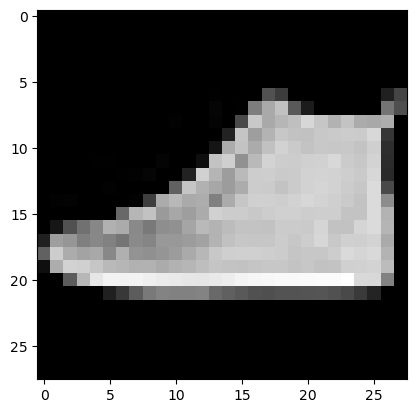

In [3]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

# 1. Предобработка данных

## 1.1 Нормировка и изменение формы признаков

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.min(), X_train.max()

(0.0, 1.0)

In [5]:
# Вытягивание признаков в вектор-строку длиной 784
X_train = X_train.reshape((-1, 28 * 28))            # первую размерность оставляем как есть
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 1.2 Обработка целевого признака

In [6]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

# 2. Исследование простых нейросетей

## 2.1 В зависимости от числа нейронов слоя

In [7]:
num_epochs = 5
batch_size = 256

In [8]:
stata_1 = pd.DataFrame(columns=['Число нейронов слоя', 'accuracy_train', 'accuracy_test'])
stata_1

,Число нейронов слоя,accuracy_train,accuracy_test


In [9]:
%%time

from keras.layers import Dense
from keras.models import Sequential

for nn in [8, 16, 32, 64, 128, 256, 512]:
    tf.random.set_seed(42)
    model = Sequential()
    # входной слой за слой не считаем, только скрытый(-ые) и выходной
    model.add(Dense(nn, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    print(100 * '*')
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

    stata_1 = stata_1.append(
        {
            'Число нейронов слоя': int(nn),
            'accuracy_train': train_metric,
            'accuracy_test': test_metric
            },
            ignore_index=True
        )

2023-11-28 23:11:11.626567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
235/235 [==============================] - 3s 9ms/step - loss: 1.4687 - accuracy: 0.4640 - val_loss: 1.0191 - val_accuracy: 0.7020
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 0.7565 - accuracy: 0.7674 - val_loss: 0.6531 - val_accuracy: 0.7771
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.5934 - accuracy: 0.7994 - val_loss: 0.5847 - val_accuracy: 0.8001
Epoch 4/5
235/235 [==============================] - 1s 6ms/step - loss: 0.5358 - accuracy: 0.8201 - val_loss: 0.5395 - val_accuracy: 0.8162
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.4937 - accuracy: 0.8327 - val_loss: 0.5080 - val_accuracy: 0.8253
****************************************************************************************************
Epoch 1/5
235/235 [==============================] - 2s 7ms/step - loss: 1.0185 - accuracy: 0.6545 - val_loss: 0.6214 - val_accuracy: 0.7909
Epoch 2/5
235/235 [==============================] - 

In [10]:
stata_1

,Число нейронов слоя,accuracy_train,accuracy_test
0,8.0,0.837433,0.8253
1,16.0,0.855283,0.8390
2,32.0,0.861950,0.8452
3,64.0,0.874683,0.8573
4,128.0,0.885067,0.8657
5,256.0,0.889900,0.8665
6,512.0,0.892567,0.8685


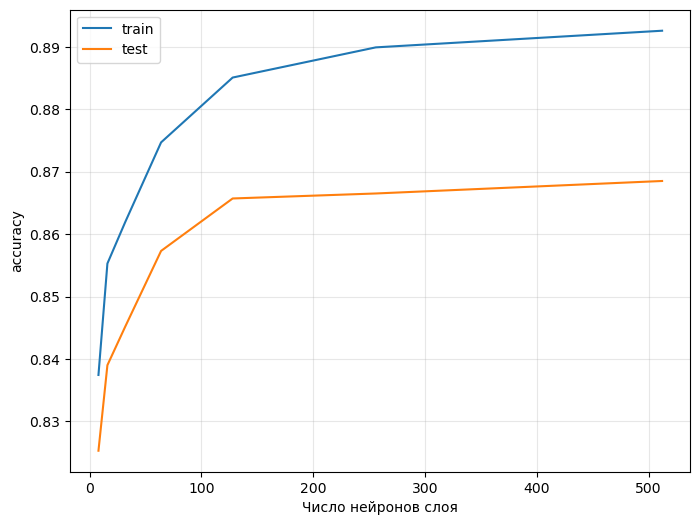

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(stata_1['Число нейронов слоя'], stata_1['accuracy_train'], label='train')
plt.plot(stata_1['Число нейронов слоя'], stata_1['accuracy_test'], label='test')
plt.xlabel('Число нейронов слоя')
plt.ylabel('accuracy')
plt.grid(alpha=.3)
plt.legend(loc='best');

**Выводы по п. 2.1:**

Увеличение числа нейронов в скрытом слое сети ведет к улучшению точности классификации модели (и на тренировочных, и на тестовых даных)

## 2.2 В зависимости от количества слоев (при близких размерах сети)

In [12]:
stata_2 = pd.DataFrame(columns=['Количество слоев', 'Количество параметров',
                                'accuracy_train', 'accuracy_test']
                                )
stata_2

,Количество слоев,Количество параметров,accuracy_train,accuracy_test


In [13]:
model_2 = Sequential()
model_2.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model_2.add(Dense(10, activation='sigmoid'))
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               100480    
                                                                 


 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_3 = Sequential()
model_3.add(Dense(115, input_shape=(28 * 28,), activation='relu'))
model_3.add(Dense(90, activation='relu'))
model_3.add(Dense(10, activation='sigmoid'))
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 115)               90275     
                                                                 
 dense_17 (Dense)            (None, 90)                10440     
                                                                 
 dense_18 (Dense)            (None, 10)                910       
                                                                 
Total params: 101,625
Trainable params: 101,625
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_5 = Sequential()
model_5.add(Dense(103, input_shape=(28 * 28,), activation='relu'))
model_5.add(Dense(94, activation='relu'))
model_5.add(Dense(75, activation='relu'))
model_5.add(Dense(46, activation='relu'))
model_5.add(Dense(10, activation='sigmoid'))
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 103)               80855     
                                                                 
 dense_20 (Dense)            (None, 94)                9776      
                                                                 
 dense_21 (Dense)            (None, 75)                7125      
                                                                 
 dense_22 (Dense)            (None, 46)                3496      
                                                                 
 dense_23 (Dense)            (None, 10)                470       
                                                                 
Total params: 101,722
Trainable params: 101,722
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_10 = Sequential()
model_10.add(Dense(92, input_shape=(28 * 28,), activation='relu'))
model_10.add(Dense(88, activation='relu'))
model_10.add(Dense(76, activation='relu'))
model_10.add(Dense(67, activation='relu'))
model_10.add(Dense(56, activation='relu'))
model_10.add(Dense(44, activation='relu'))
model_10.add(Dense(32, activation='relu'))
model_10.add(Dense(29, activation='relu'))
model_10.add(Dense(12, activation='relu'))
model_10.add(Dense(10, activation='sigmoid'))
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 92)                72220     
                                                                 
 dense_25 (Dense)            (None, 88)                8184      
                                                                 
 dense_26 (Dense)            (None, 76)                6764      
                                                                 
 dense_27 (Dense)            (None, 67)                5159      
                                                                 
 dense_28 (Dense)            (None, 56)                3808      
                                                                 
 dense_29 (Dense)            (None, 44)                2508      
                                                                 
 dense_30 (Dense)            (None, 32)              

In [17]:
models = [model_2, model_3, model_5, model_10]

In [18]:
%%time

for model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )
    print(100 * '*')
    train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
    test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

    stata_2 = stata_2.append(
        {
            'Количество слоев': len(model.get_config()['layers'])-1,
            'Количество параметров': model.count_params(),
            'accuracy_train': train_metric,
            'accuracy_test': test_metric
        },
        ignore_index=True
        )

Epoch 1/5
235/235 [==============================] - 3s 6ms/step - loss: 1.7325 - accuracy: 0.5026 - val_loss: 1.3983 - val_accuracy: 0.6259
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 1.2234 - accuracy: 0.6581 - val_loss: 1.1107 - val_accuracy: 0.6685
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 1.0251 - accuracy: 0.6876 - val_loss: 0.9793 - val_accuracy: 0.6880
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.9232 - accuracy: 0.7088 - val_loss: 0.9017 - val_accuracy: 0.7057
Epoch 5/5
235/235 [==============================] - 2s 7ms/step - loss: 0.8593 - accuracy: 0.7251 - val_loss: 0.8496 - val_accuracy: 0.7212
****************************************************************************************************
Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 1.9843 - accuracy: 0.3839 - val_loss: 1.6719 - val_accuracy: 0.5793
Epoch 2/5
235/235 [==============================] - 

In [19]:
stata_2

,Количество слоев,Количество параметров,accuracy_train,accuracy_test
0,2.0,101770.0,0.732017,0.7212
1,3.0,101625.0,0.705750,0.6985
2,5.0,101722.0,0.689183,0.6828
3,10.0,101530.0,0.311283,0.3091


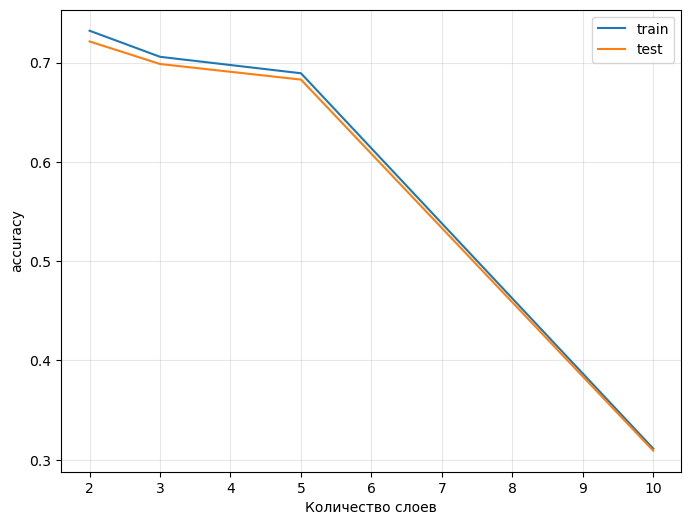

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(stata_2['Количество слоев'], stata_2['accuracy_train'], label='train')
plt.plot(stata_2['Количество слоев'], stata_2['accuracy_test'], label='test')
plt.xlabel('Количество слоев')
plt.ylabel('accuracy')
plt.grid(alpha=.3)
plt.legend(loc='best');

**Выводы по п. 2.2:**

Увеличение количества слоев (при примерно одинаковом количестве обучемых параметров) ведет к ухудшению точности классификации модели. Происходит её переобучение.

# 3. Исследование работы разных оптимизаторов (`SGD`, `Adam`, `RMSProp`)

In [21]:
config_5 = model_5.get_config()

In [22]:
stata_3 = pd.DataFrame(columns=['Оптимизатор', 'accuracy_train', 'accuracy_test'])
stata_3

,Оптимизатор,accuracy_train,accuracy_test


In [23]:
%%time

from keras import optimizers

for opt in [optimizers.gradient_descent_v2.SGD(),
            optimizers.adam_v2.Adam(),
            optimizers.rmsprop_v2.RMSprop()
            ]:
        # инициализируем последовательную модель параметрами от model_5
        model = Sequential()
        model = model.from_config(config_5)
        
        model.compile(
                optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'],
                )
        

        model.fit(X_train, y_train,
                  epochs=num_epochs,
                  batch_size=batch_size,
                  validation_data=(X_test, y_test),
                  verbose=1)
        print(100 * '*')
        
        train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=batch_size, verbose=0)
        test_loss, test_metric = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

        stata_3 = stata_3.append(
                {'Оптимизатор': model.optimizer.get_config()['name'],
                 'accuracy_train': train_metric,
                 'accuracy_test': test_metric
                 },
                 ignore_index=True
                 )

        

Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 1.7282 - accuracy: 0.4203 - val_loss: 1.1082 - val_accuracy: 0.6615
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.8786 - accuracy: 0.7104 - val_loss: 0.7673 - val_accuracy: 0.7362
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6978 - accuracy: 0.7513 - val_loss: 0.6750 - val_accuracy: 0.7557
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6262 - accuracy: 0.7758 - val_loss: 0.7456 - val_accuracy: 0.7266
Epoch 5/5
235/235 [==============================] - 1s 6ms/step - loss: 0.5872 - accuracy: 0.7903 - val_loss: 0.6568 - val_accuracy: 0.7502
****************************************************************************************************
Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.6405 - accuracy: 0.7716 - val_loss: 0.4756 - val_accuracy: 0.8326
Epoch 2/5
235/235 [==============================] - 

In [24]:
stata_3

,Оптимизатор,accuracy_train,accuracy_test
0,SGD,0.759783,0.7502
1,Adam,0.888033,0.8691
2,RMSprop,0.865750,0.8480


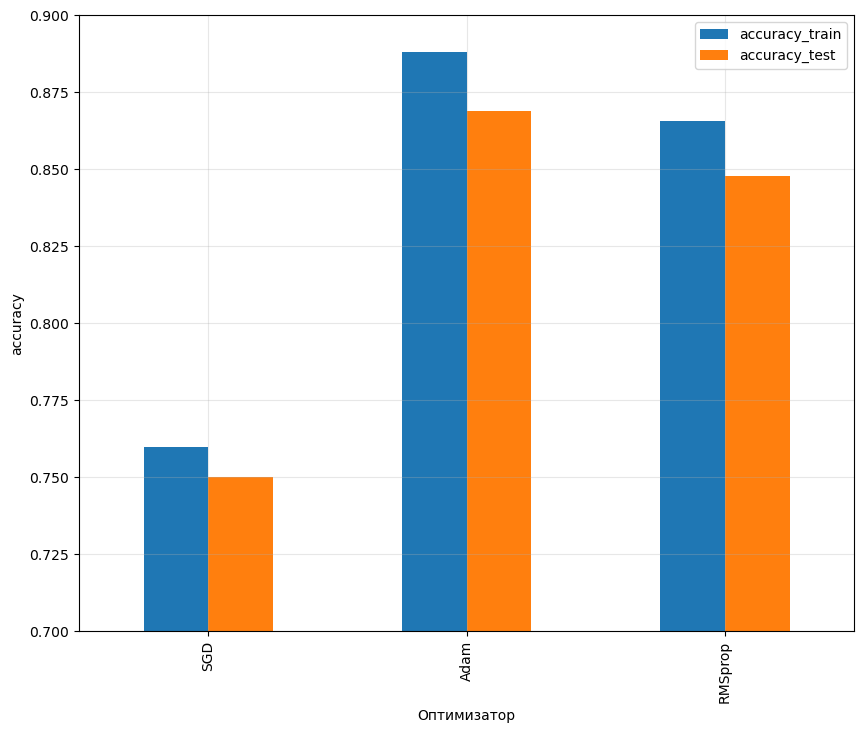

In [36]:
stata_3.plot(x='Оптимизатор', kind='bar', figsize=(10, 8))
plt.xlabel('Оптимизатор')
plt.ylim([.7, .9])
plt.ylabel('accuracy')
plt.grid(alpha=.3)
plt.legend(loc='best');

**Выводы по п.п 2-3:**

Оптимизатор `Adam` ожидаемо показал лучшие метрики качества (как на трейне, так и на тесте).

Улучшению качества классификации способствовало увеличение количества нейронов скрытого слоя сети и изменение оптимизатора на подходящий к конкретной задаче

# 4. Матрица ошибок по классам для сети `model_5`

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 4.1 На трейне

In [27]:
y_pred_train = model_5.predict(X_train, batch_size=batch_size)
y_pred_train_labels = y_pred_train.argmax(axis=1)

235/235 [==============================] - 1s 4ms/step


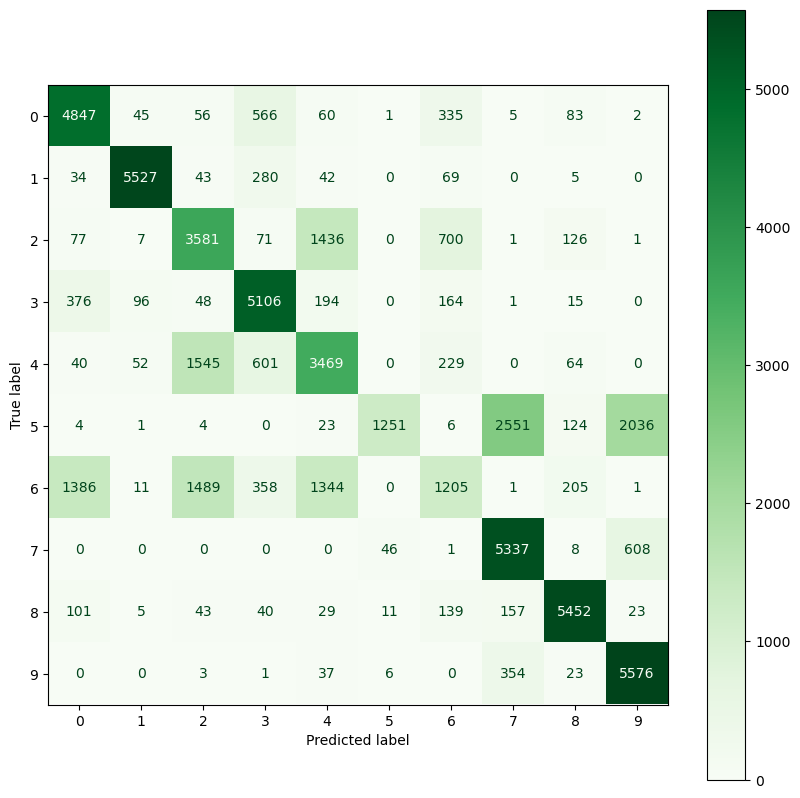

In [28]:
cm = confusion_matrix(y_train_labels, y_pred_train_labels)

disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Greens');

## 4.2 На тесте

In [29]:
y_pred_test = model_5.predict(X_test, batch_size=batch_size)
y_pred_test_labels = y_pred_test.argmax(axis=1)         # предсказываем метки

40/40 [==============================] - 0s 3ms/step


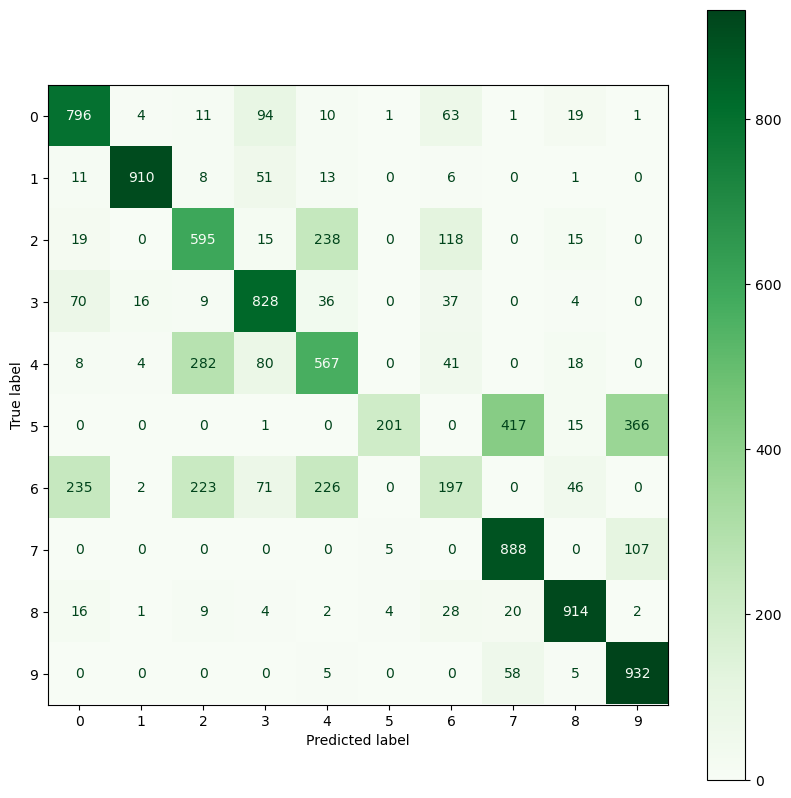

In [30]:
# матрица ошибок
cm = confusion_matrix(y_test_labels, y_pred_test_labels)

# отображение
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='Greens');

# 5. Метрики качества модели `model_5` по каждому классу отдельно (полнота, точность)

In [31]:
from sklearn.metrics import classification_report

cr_dict = classification_report(y_test_labels, y_pred_test_labels, output_dict=True)
cr_df = pd.DataFrame(cr_dict).transpose()
cr_df

,precision,recall,f1-score,support
0,0.689177,0.7960,0.738747,1000.0000
1,0.971185,0.9100,0.939597,1000.0000
2,0.523307,0.5950,0.556855,1000.0000
3,0.723776,0.8280,0.772388,1000.0000
4,0.516864,0.5670,0.540773,1000.0000
5,0.952607,0.2010,0.331957,1000.0000
6,0.402041,0.1970,0.264430,1000.0000
7,0.641618,0.8880,0.744966,1000.0000
8,0.881389,0.9140,0.897398,1000.0000
9,0.661932,0.9320,0.774086,1000.0000


In [32]:
# проверка
from sklearn.metrics import precision_score, recall_score

(precision_score(y_test_labels, y_pred_test_labels, average='macro', labels='6'),
recall_score(y_test_labels, y_pred_test_labels, average='macro', labels='6'))

(0.4020408163265306, 0.197)

In [33]:
# соответствует
tuple(cr_df.iloc[6][['precision', 'recall']])

(0.4020408163265306, 0.197)

Найдем метки, которые хуже всего и лучше всего классифицровала model_5:

In [34]:
cr_df['precision'].argmax(), cr_df['recall'].argmax()

(1, 9)

In [35]:
cr_df['precision'].argmin(), cr_df['recall'].argmin()

(6, 6)

**Выводы по п. 5:**

Наибольшую точность классификации модель `model_5` показала для класса 1 (брюки). Наибольшую полноту – для класса 9 (ботинок с высоким берцем).

Минимальные точность и полноту классификации модель `model_5` показала для класса 6 (рубашка).